In [38]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
import seaborn as sns
%matplotlib notebook

In [39]:
basepath = '/Users/blandt/Desktop/Data/T2A/210804_nwg378_tom4,5,60,500'
paths = direcslist(basepath, 0)

imgs = [load_image(p + '/af_corrected.tif') for p in paths]
rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths]

### Method 1: Average profile

In [45]:
imgs_straight = [straighten(i, r, 50, ninterp=50) for i, r in zip(imgs, rois)]
profiles = [bounded_mean_2d(s, [0, 1]) for s in imgs_straight]
profiles_norm = [p / bounded_mean_1d(p, [0.9, 1]) for p in profiles]
mean_profile = np.mean(np.array(profiles_norm), axis=0)
np.savetxt('cytbg.txt', mean_profile)

<IPython.core.display.Javascript object>


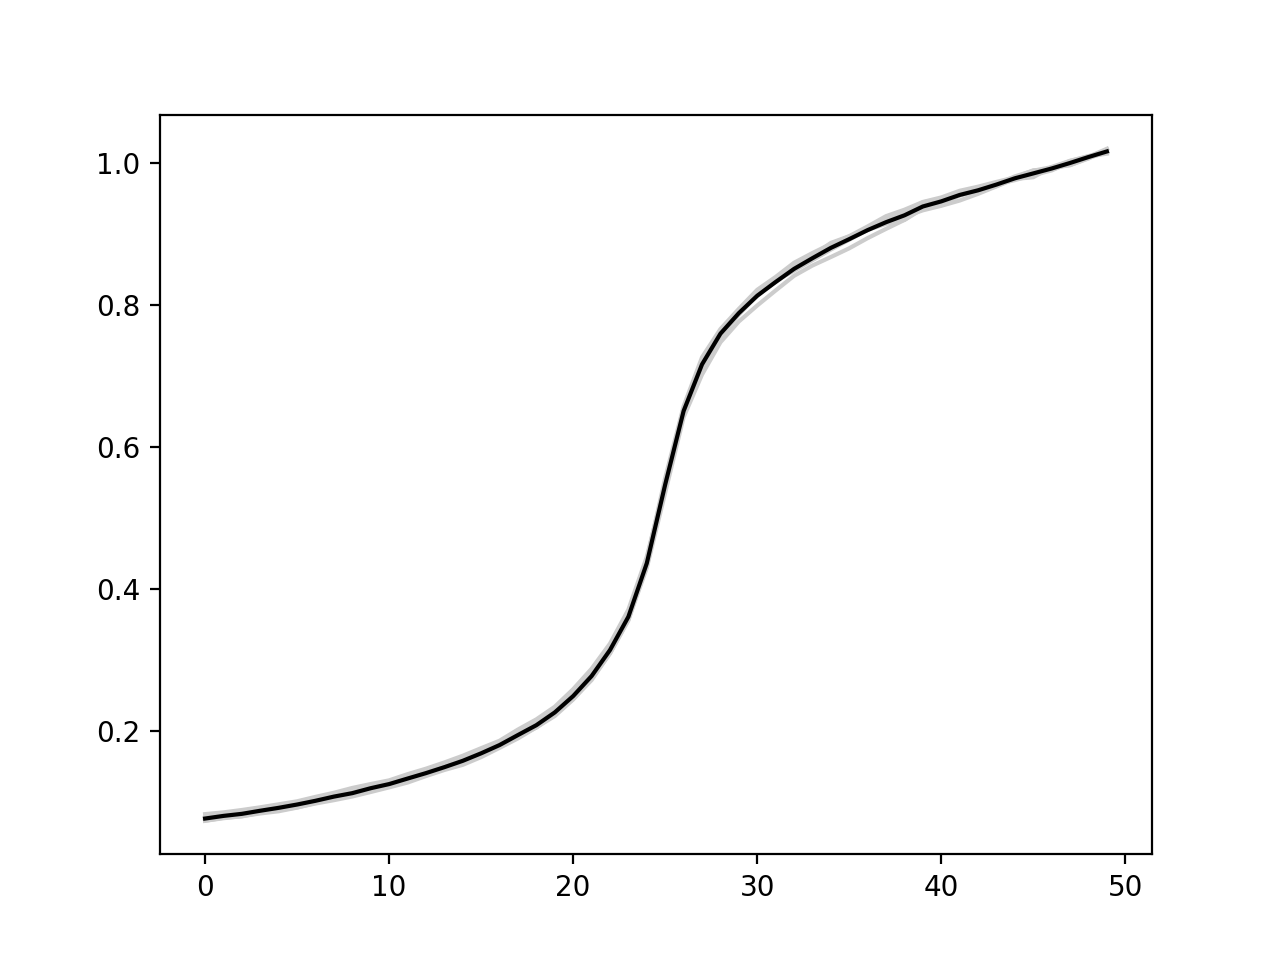

In [46]:
fig, ax = plt.subplots()
for p in profiles_norm:
    ax.plot(p, c='0.8')
ax.plot(mean_profile, c='k')

### Method 2: Gradient descent

In [29]:
iq = ImageQuant(img=imgs[0], roi=rois[0], descent_steps=700, rol_ave=5, lr=0.002, iterations=1, 
                uni_cyt=True, interp_type='cubic', cyt_only=True, adaptive_cytbg=True, save_training=True, 
               thickness=60)
iq.run()

100%|██████████| 700/700 [00:18<00:00, 38.86it/s]


Time elapsed: 18.11 seconds 


<IPython.core.display.Javascript object>


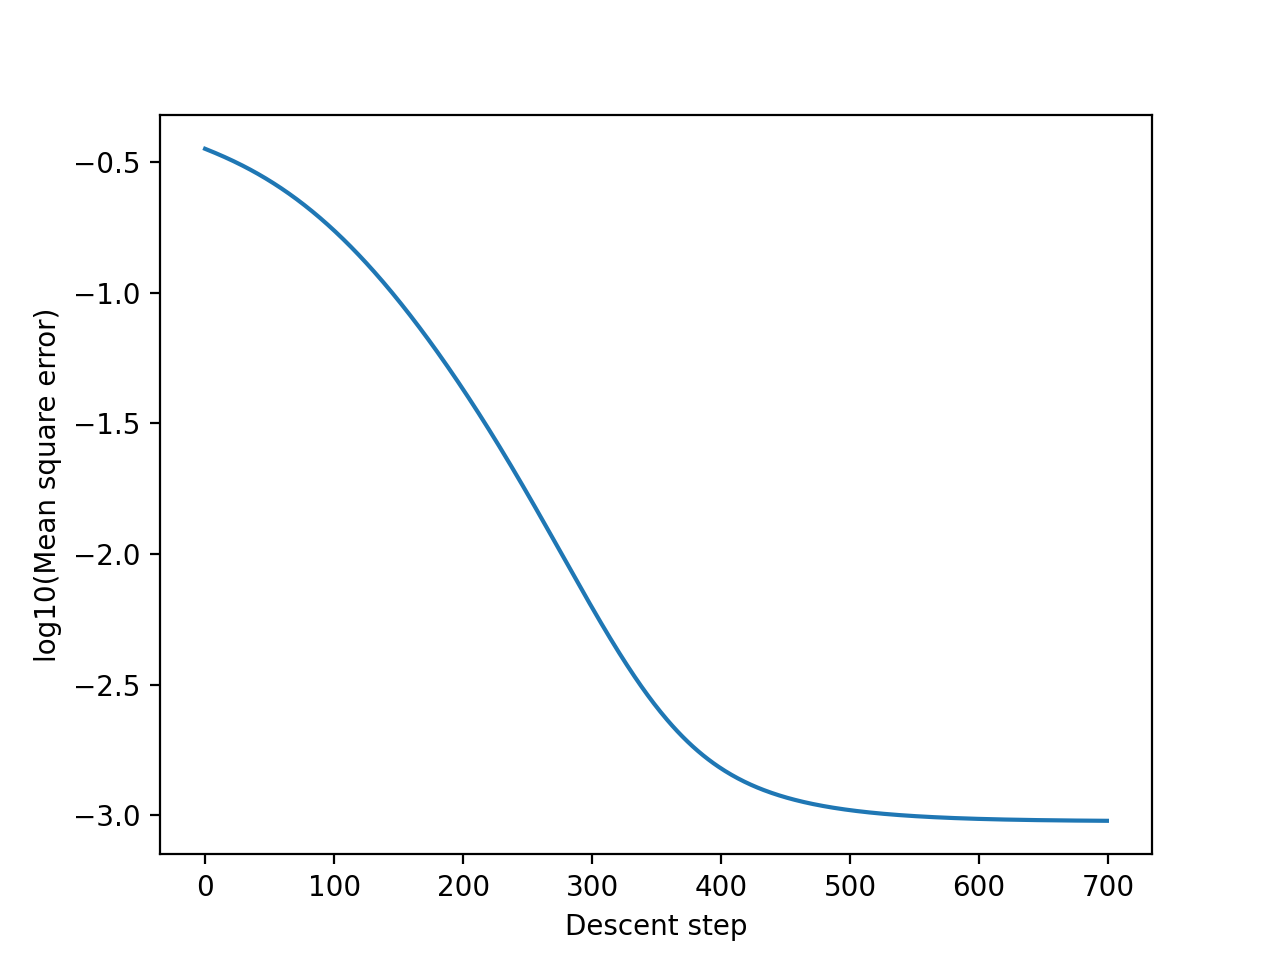

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

In [30]:
iq.plot_losses(log=True)

<IPython.core.display.Javascript object>


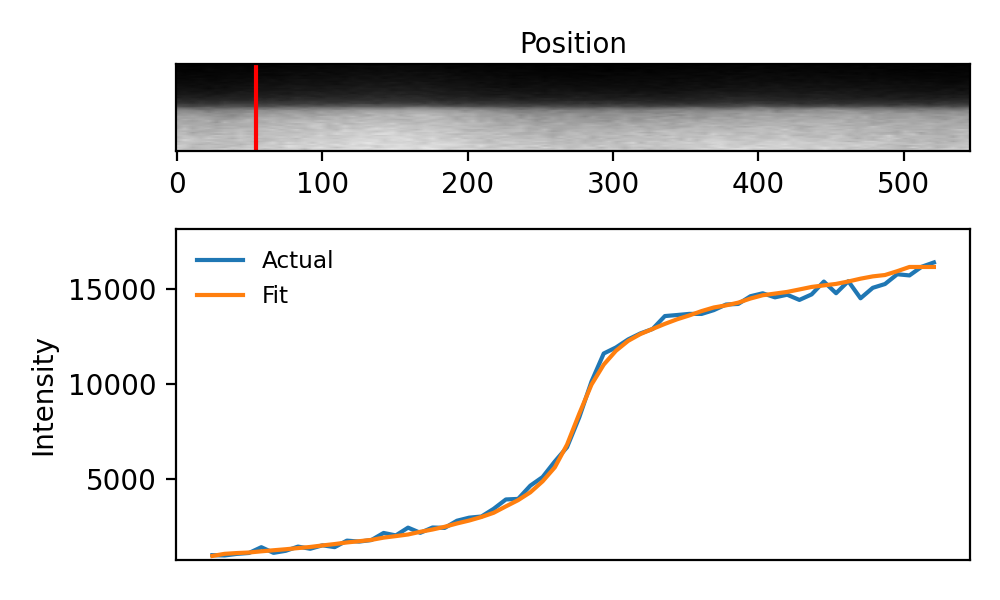

interactive(children=(FloatSlider(value=0.1, description='Position', max=1.0, step=0.01), Output()), _dom_clas…

(<Figure size 500x300 with 2 Axes>,
 (<AxesSubplot:xlabel='Position'>, <AxesSubplot:ylabel='Intensity'>))

In [31]:
iq.plot_fits(jupyter=True)

<IPython.core.display.Javascript object>


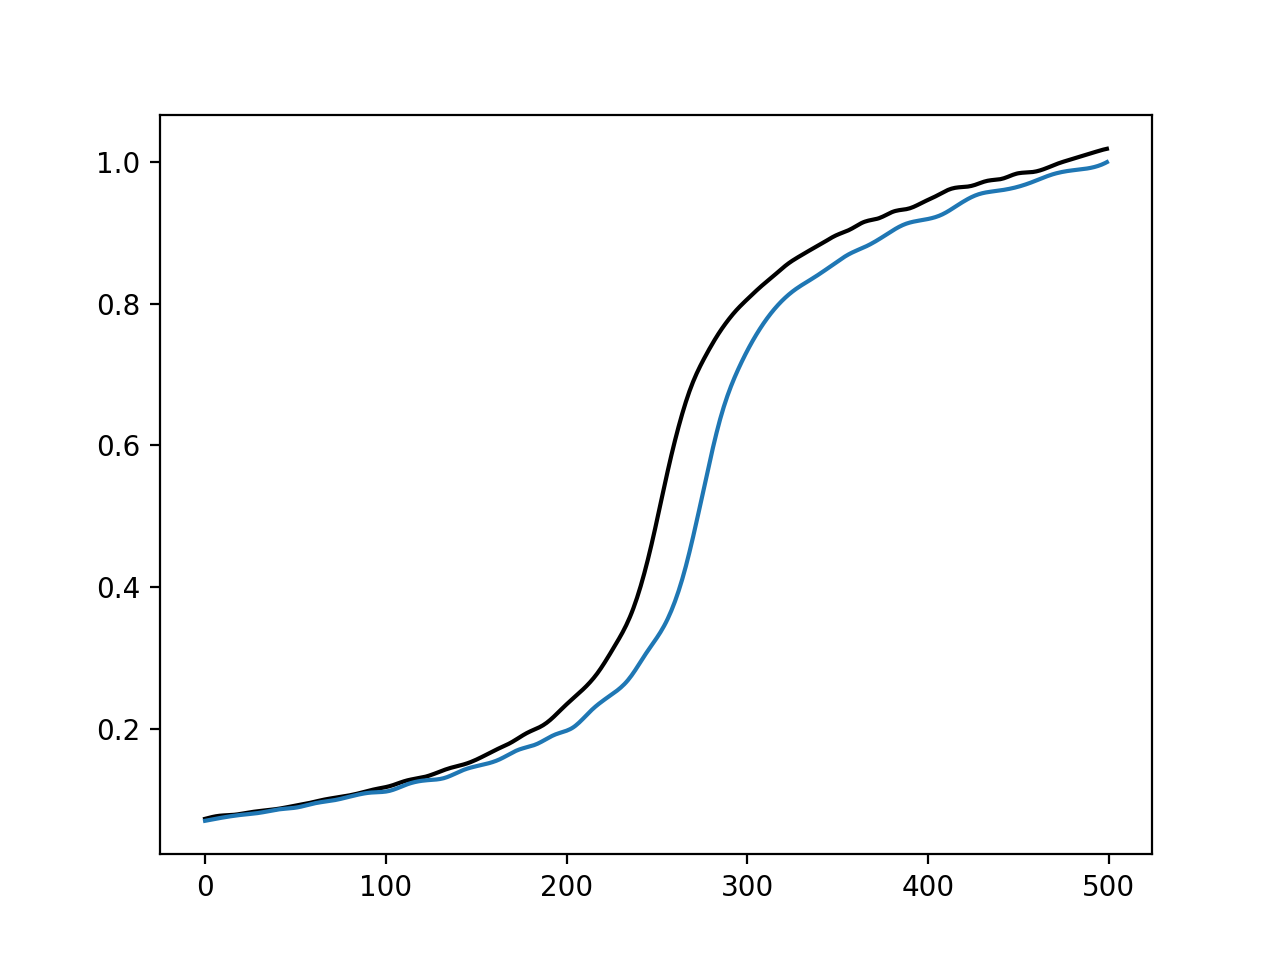

In [33]:
fig, ax = plt.subplots()
ax.plot(mean_profile, c='k')
c = iq.cytbg[5:-5]
ax.plot(interp_1d_array(c / max(c), 500), c='tab:blue')

<IPython.core.display.Javascript object>


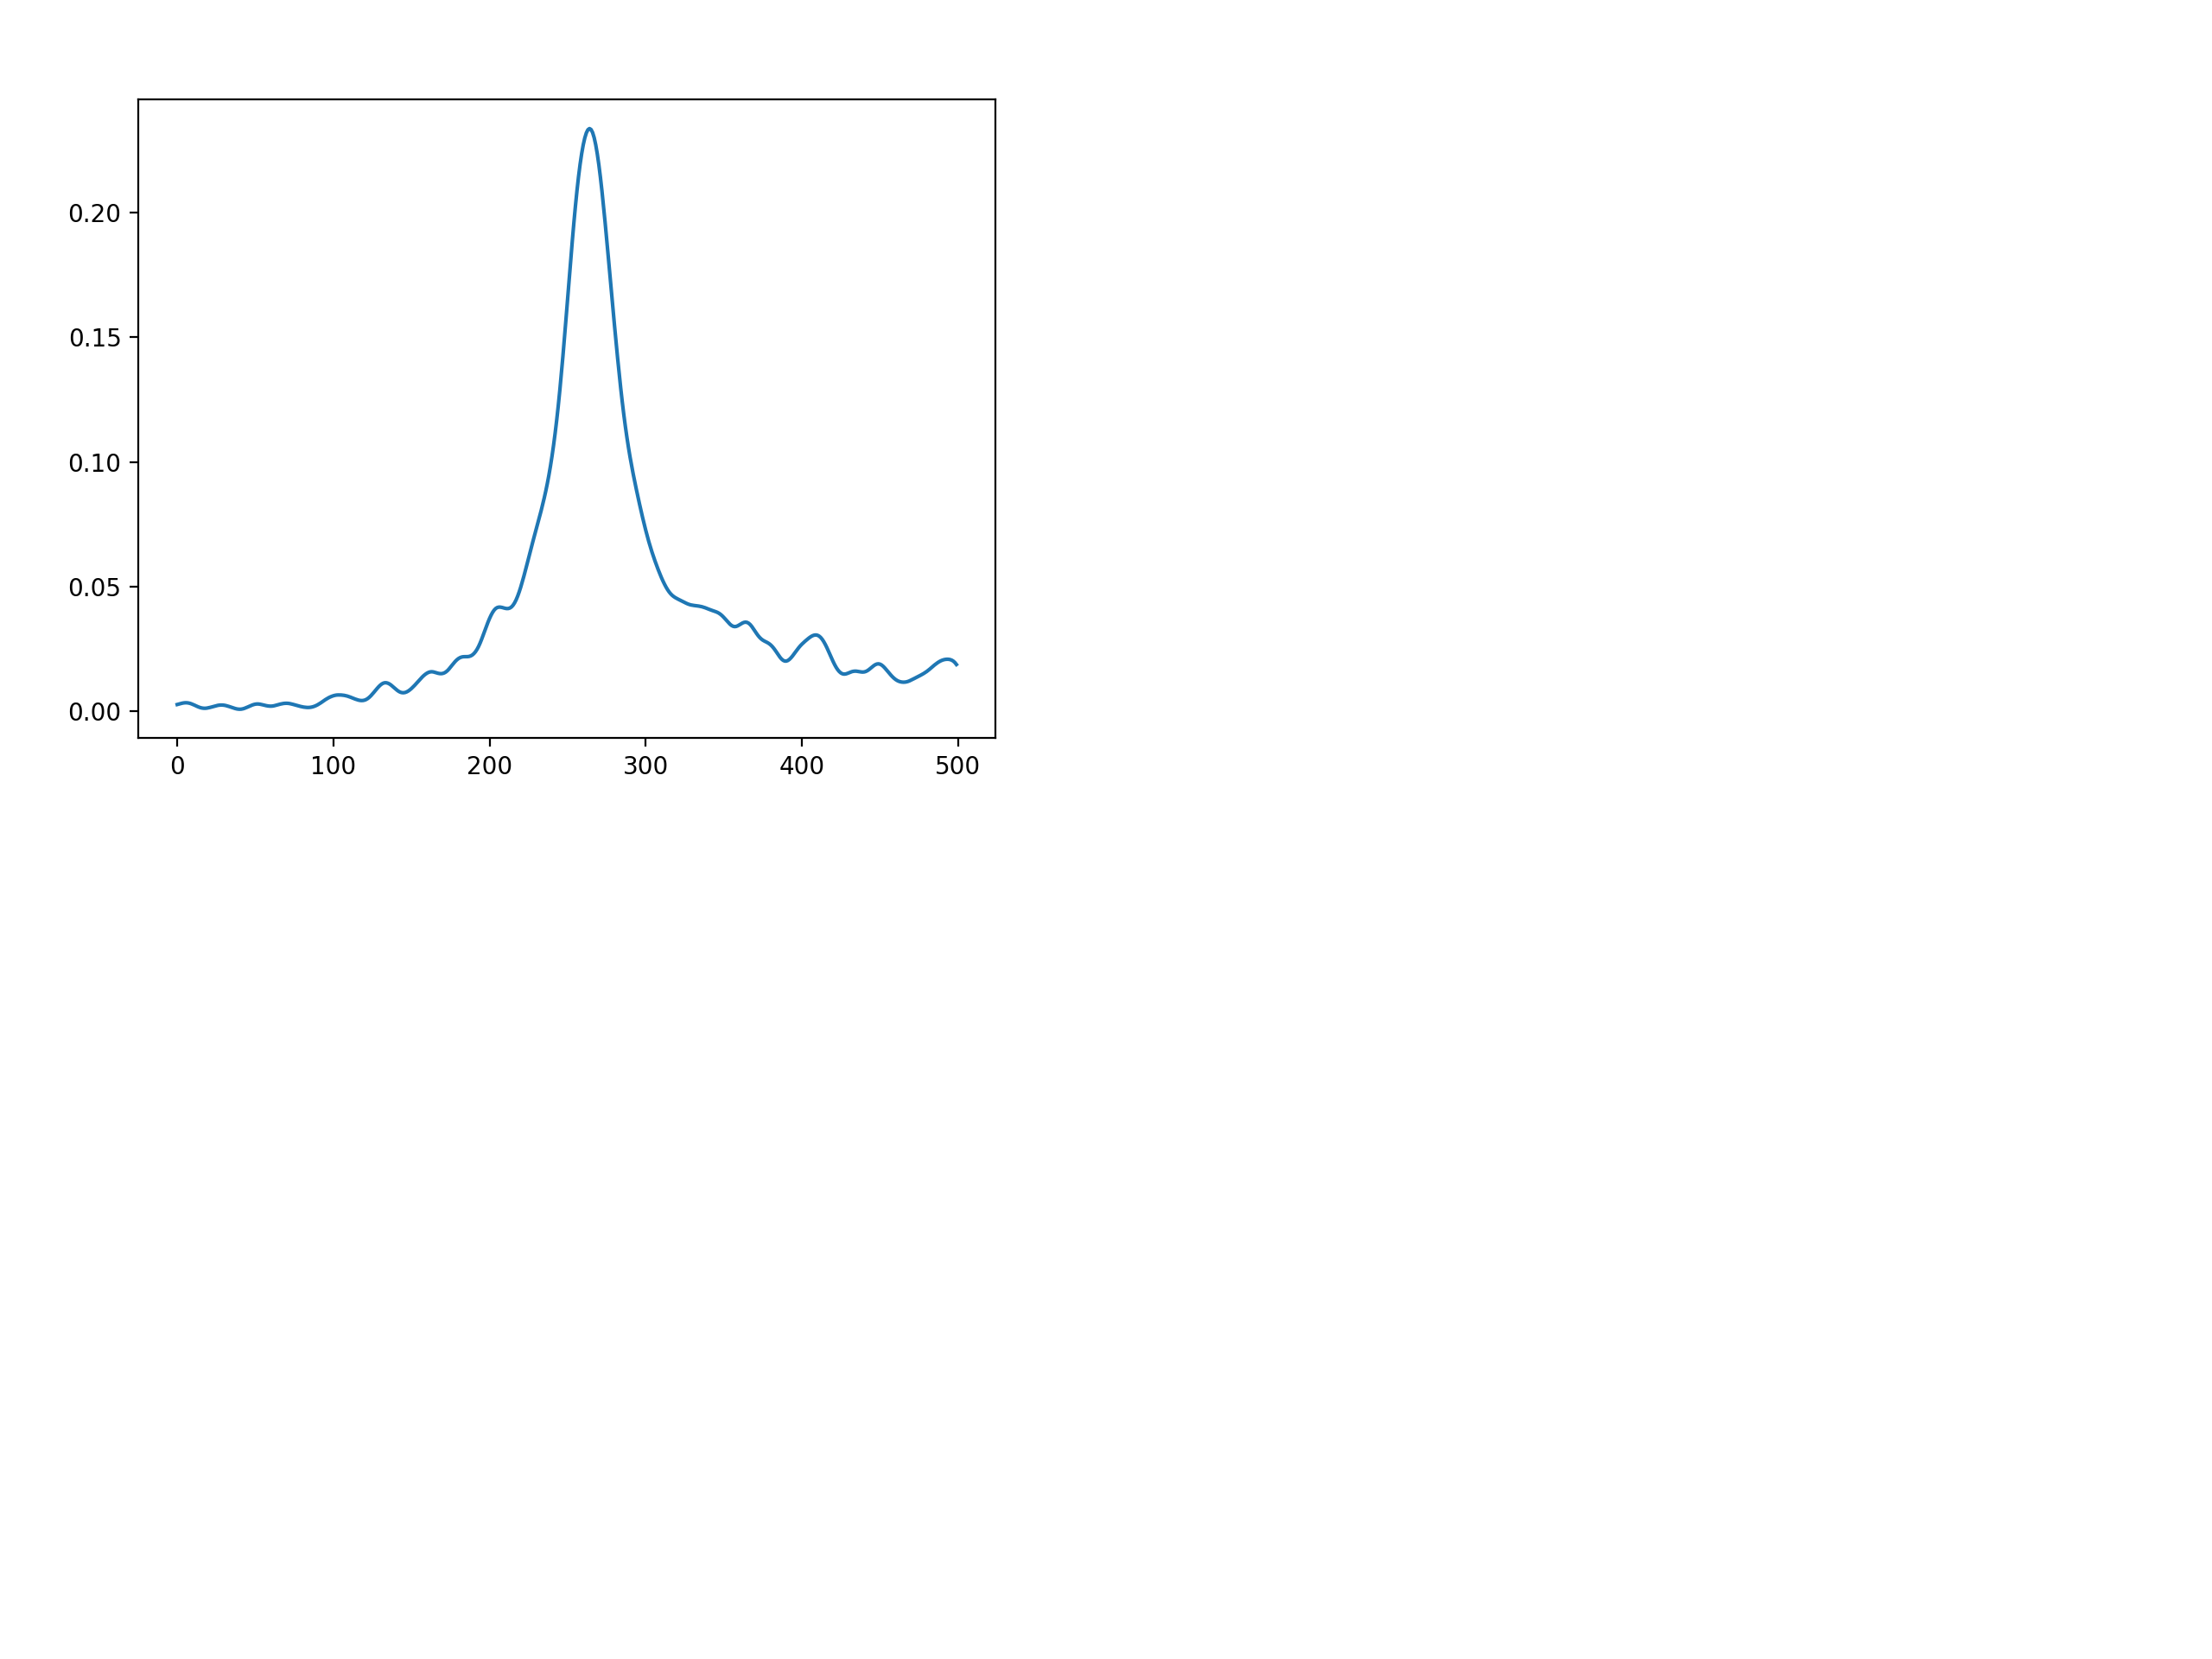

In [36]:
fig, ax = plt.subplots()
ax.plot(mean_profile - interp_1d_array(c / max(c), 500))

<IPython.core.display.Javascript object>


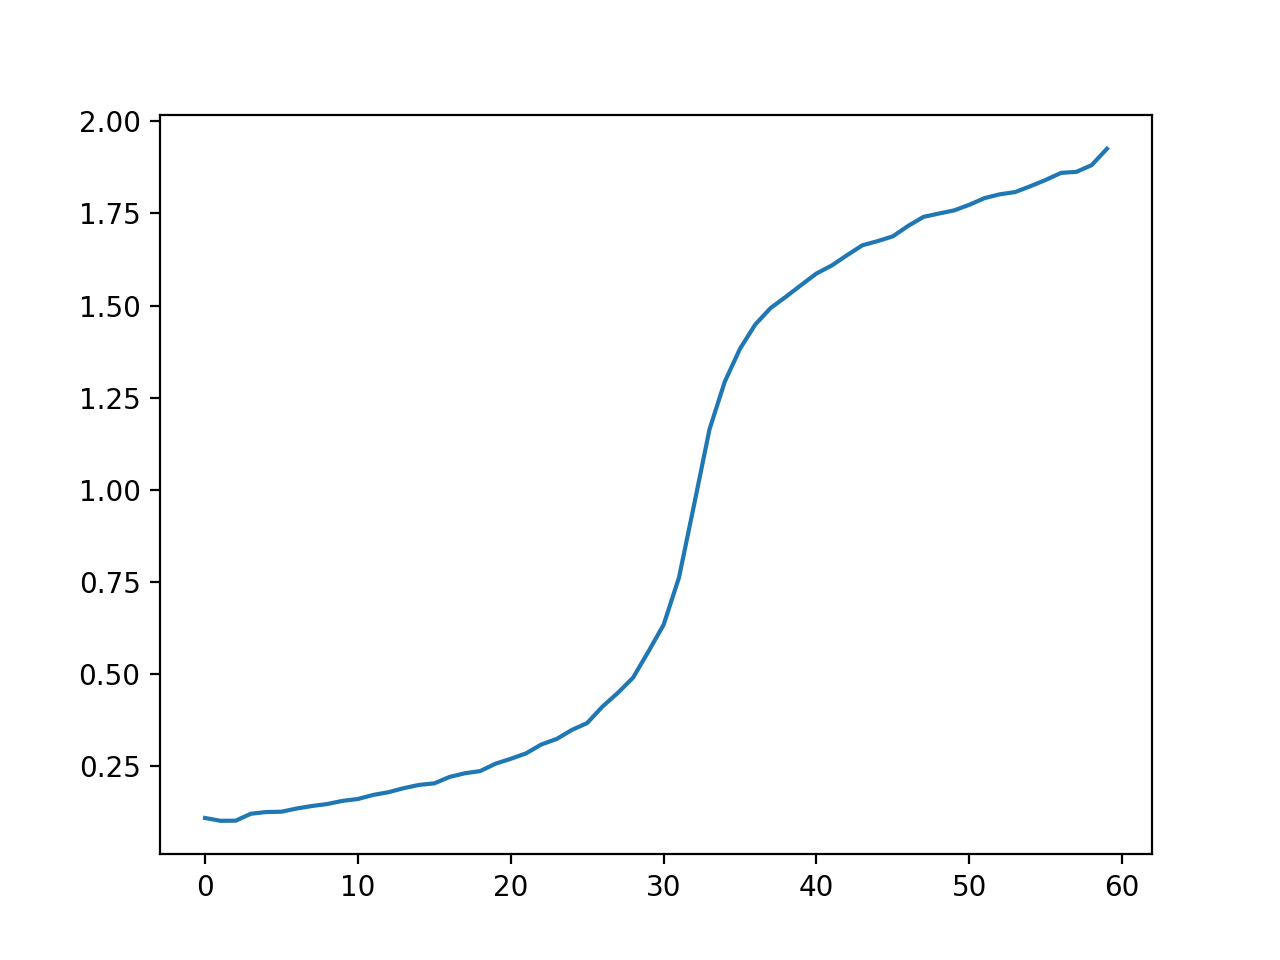

interactive(children=(IntSlider(value=0, description='i', max=699), Output()), _dom_classes=('widget-interact'…

In [37]:
import ipywidgets as widgets

fig, ax = plt.subplots()
@widgets.interact(i=(0, len(iq.saved_vars) - 1, 1))
def update(i=0): 
    ax.clear()
#     for j in iq2.saved_vars[i]['cytbg']:
#         ax.plot(j)
    ax.plot(iq.saved_vars[i]['cytbg'])